<a href="https://colab.research.google.com/github/southjohn64/data_mine/blob/main/Copy_of_HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework Assignment 3

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

import json
import os

# Installing the Kaggle package
!pip install kaggle 

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
#api_token = {"username":"<Insert Your Kaggle User Name>","key":"<Insert Your Kaggle API key>"}


# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive
#with open('/root/.kaggle/kaggle.json', 'w') as file:
#  json.dump(api_token, file)
!mkdir /root/.kaggle/
# NOTICE: place the path to your kaggle.json file on your drive
!cp /content/drive/MyDrive/kaggle.json  /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
!pip install turicreate

     |████████████████████████████████| 92.0 MB 13 kB/s 
     |████████████████████████████████| 3.6 MB 27.2 MB/s 
     |████████████████████████████████| 322 kB 46.8 MB/s 
     |████████████████████████████████| 3.5 MB 30.9 MB/s 
     |████████████████████████████████| 86.4 MB 58 kB/s 
     |████████████████████████████████| 18.3 MB 85 kB/s 
     |████████████████████████████████| 2.9 MB 21.1 MB/s 
     |████████████████████████████████| 3.8 MB 53.2 MB/s 
     |████████████████████████████████| 50 kB 2.2 MB/s 
     |████████████████████████████████| 20.1 MB 79.7 MB/s 
     |████████████████████████████████| 449 kB 56.1 MB/s 
  Created wheel for prettytable: filename=prettytable-0.7.2-py3-none-any.whl size=13714 sha256=8294916be8356ddd111627ebdc9857f727adb0d600c32f2a3ec7de280b7e27cc
  Stored in directory: /root/.cache/pip/wheels/b2/7f/f6/f180315b584f00445045ff1699b550fa895d09471337ce21c6
  Created wheel for resampy: filename=resampy-0.2.1-py3-none-any.whl size=320860 sha256=cbc914dd62f

Using the [Seattle Library Collection Inventory Dataset](https://www.kaggle.com/city-of-seattle/seattle-library-collection-inventory#library-collection-inventory.csv) and TuriCreate please, answer the following questions:

**Question 1:** Write a function that returns the most popular book in each subject. Use it to find the most popular book in
    the _Mystery Fiction_ subject (15pt)

In [ ]:
# Creating a dataset directory

!mkdir ./datasets
!mkdir ./datasets/library-collection

# download the dataset from Kaggle and unzip it
!kaggle datasets download city-of-seattle/seattle-library-collection-inventory  -f library-collection-inventory.csv -p ./datasets/library-collection/
!unzip ./datasets/library-collection/*.zip  -d ./datasets/library-collection
!ls ./datasets/library-collection

100% 3.77G/3.77G [01:10<00:00, 33.1MB/s]
100% 3.77G/3.77G [01:10<00:00, 57.1MB/s]
Archive:  ./datasets/library-collection/library-collection-inventory.csv.zip
  inflating: ./datasets/library-collection/library-collection-inventory.csv  
library-collection-inventory.csv  library-collection-inventory.csv.zip


In [ ]:
import turicreate as tc
%matplotlib inline

#Loading a CSV to SFrame (this can take some time)
sf = tc.SFrame.read_csv("/content/datasets/library-collection/library-collection-inventory.csv")
sf

Successfully parsed 10 tokens: 
	0: 735439
	1: ["Genealog ... t.",,1947]
	2: 
	3: Enloes family
	4: arbk
	5: caref
	6: 
	7: cen
	8: 2017-09-01 ... :00:00.000
	9: 1

1 lines failed to parse correctly

Finished parsing file /content/datasets/library-collection/library-collection-inventory.csv

Parsing completed. Parsed 100 lines in 2.08769 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,str,str,str,str,str,str,str,str,str,str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Successfully parsed 10 tokens: 
	0: 735439
	1: [Genealogy ... t.",,1947]
	2: 
	3: Enloes family
	4: arbk
	5: caref
	6: 
	7: cen
	8: 2017-09-01 ... :00:00.000
	9: 1

Read 158429 lines. Lines per second: 58874.3

Read 633885 lines. Lines per second: 80155

Successfully parsed 9 tokens: 
	0: 362786
	1: [Records., ... l Society]
	2: Registers  ... astchester
	3: arbk
	4: caref
	5: 
	6: cen
	7: 2017-09-01 ... :00:00.000
	8: 1

Successfully parsed 10 tokens: 
	0: 28078
	1: [Papers.," ... 9)",,1969]
	2: 
	3: Genealogy Congresses
	4: arbk
	5: caref
	6: 
	7: cen
	8: 2017-09-01 ... :00:00.000
	9: 6

Read 1108904 lines. Lines per second: 84323.3

Successfully parsed 9 tokens: 
	0: 362786
	1: [Records., ... l Society]
	2: Registers  ... astchester
	3: arbk
	4: caref
	5: 
	6: cen
	7: 2017-10-01 ... :00:00.000
	8: 1

Read 1583786 lines. Lines per second: 85860.7

Read 2058239 lines. Lines per second: 86416.9

Successfully parsed 10 tokens: 
	0: 735439
	1: [Genealogy ... t.",,1947]
	2: 
	3: Enloes family
	4: arbk
	5: caref
	6: 
	7: cen
	8: 2017-10-01 ... :00:00.000
	9: 1

Successfully parsed 10 tokens: 
	0: 28078
	1: [Papers.," ... 9)",,1969]
	2: 
	3: Genealogy Congresses
	4: arbk
	5: caref
	6: 
	7: cen
	8: 2017-10-01 ... :00:00.000
	9: 6

Successfully parsed 10 tokens: 
	0: 735439
	1: [Genealogy ... t.",,1947]
	2: 
	3: Enloes family
	4: arbk
	5: caref
	6: 
	7: cen
	8: 2017-11-01 ... :00:00.000
	9: 1

Read 2532886 lines. Lines per second: 86609.4

Successfully parsed 10 tokens: 
	0: 28078
	1: [Papers.," ... 9)",,1969]
	2: 
	3: Genealogy Congresses
	4: arbk
	5: caref
	6: 
	7: cen
	8: 2017-11-01 ... :00:00.000
	9: 6

Read 3007318 lines. Lines per second: 86711.8

Read 3481381 lines. Lines per second: 86560.9

Successfully parsed 9 tokens: 
	0: 362786
	1: [Records., ... l Society]
	2: Registers  ... astchester
	3: arbk
	4: caref
	5: 
	6: cen
	7: 2017-11-01 ... :00:00.000
	8: 1

Read 3955167 lines. Lines per second: 86440.2

Read 4437353 lines. Lines per second: 86399.2

Read 4921517 lines. Lines per second: 86379.1

Read 5405425 lines. Lines per second: 86321.8

Read 5888741 lines. Lines per second: 86214.4

Read 6372050 lines. Lines per second: 86072

Read 6854771 lines. Lines per second: 85594.9

Read 7336799 lines. Lines per second: 85511.6

Read 7818996 lines. Lines per second: 85410.3

Read 8300537 lines. Lines per second: 85268.6

Read 8782147 lines. Lines per second: 85166.2

Read 9263355 lines. Lines per second: 85060.5

Read 9744360 lines. Lines per second: 84940.4

Read 10225169 lines. Lines per second: 84831.9

Read 10706084 lines. Lines per second: 84722.7

Read 11186676 lines. Lines per second: 84618.7

Read 11666922 lines. Lines per second: 84525.5

Read 12146869 lines. Lines per second: 84423

Read 12626390 lines. Lines per second: 84325.5

Read 13105967 lines. Lines per second: 83717.7

Read 13585401 lines. Lines per second: 83660.3

Read 14064281 lines. Lines per second: 83595.5

Read 14543355 lines. Lines per second: 83538.2

Read 15022060 lines. Lines per second: 83478

Read 15500452 lines. Lines per second: 83393.1

Read 15978873 lines. Lines per second: 83336

Read 16457329 lines. Lines per second: 83285.1

Read 16936554 lines. Lines per second: 83019.2

Read 17415198 lines. Lines per second: 82950.1

Read 17894258 lines. Lines per second: 82848.4

Read 18372819 lines. Lines per second: 82783.8

Read 18851736 lines. Lines per second: 82740.9

Read 19329570 lines. Lines per second: 82692.8

Read 19807724 lines. Lines per second: 82649.9

Read 20285070 lines. Lines per second: 82614.4

Read 20761835 lines. Lines per second: 72482.5

Read 21079789 lines. Lines per second: 72071.5

Read 21556704 lines. Lines per second: 72235.4

Read 22032463 lines. Lines per second: 72353

Read 22509210 lines. Lines per second: 72498.3

Read 22985600 lines. Lines per second: 72627

Read 23461186 lines. Lines per second: 72752.7

Read 23936996 lines. Lines per second: 72852.8

Read 24412122 lines. Lines per second: 72963.7

Read 24887351 lines. Lines per second: 73065.8

Read 25362401 lines. Lines per second: 73172.9

Read 25836643 lines. Lines per second: 73255.9

Read 26311136 lines. Lines per second: 73329.5

Read 26785396 lines. Lines per second: 73415

Read 27259263 lines. Lines per second: 73471.8

Read 27733054 lines. Lines per second: 73551.8

Read 28205409 lines. Lines per second: 73611.3

Read 28669987 lines. Lines per second: 73562.2

Read 29134252 lines. Lines per second: 73621.6

Successfully parsed 10 tokens: 
	0: 332256
	1: [Souvenir  ... )",,1930?]
	2: Lumbermen' ... rint. Co.,
	3: 
	4: arbk
	5: casea
	6: 
	7: cen
	8: 2019-07-01 ... :00:00.000
	9: 1

Read 29599175 lines. Lines per second: 73658.9

Read 30062536 lines. Lines per second: 73706.3

Read 30525807 lines. Lines per second: 73755.1

Read 30988998 lines. Lines per second: 73784.5

Read 31453271 lines. Lines per second: 73812.8

Read 31917620 lines. Lines per second: 73850.2

Read 32382098 lines. Lines per second: 73885.9

Read 32845822 lines. Lines per second: 73922.5

Read 33309009 lines. Lines per second: 73944.4

Read 33772148 lines. Lines per second: 73984.2

Read 34235739 lines. Lines per second: 74007.4

Read 34698812 lines. Lines per second: 74038.6

Read 35161548 lines. Lines per second: 74061.9

14 lines failed to parse correctly

Finished parsing file /content/datasets/library-collection/library-collection-inventory.csv

Parsing completed. Parsed 35531294 lines in 477.941 secs.

BibNum,Title,Author,ISBN,PublicationYear
3011076,A tale of two friends /adapted by Ellie O'Ry ...,"O'Ryan, Ellie","1481425730, 1481425749,9781481425735, ...",2014.
2248846,"Naruto. Vol. 1, UzumakiNaruto / story and ar ...","Kishimoto, Masashi, 1974-",1569319006,"2003, c1999."
3209270,"Peace, love & Wi-Fi : aZITS treasury / by Jerry ...","Scott, Jerry, 1955-","144945867X, 9781449458676",2014.
1907265,The Paris pilgrims : anovel / Clancy Carlile. ...,"Carlile, Clancy, 1930-",0786706155,c1999.
1644616,"Erotic by nature : acelebration of life, of ...",,094020813X,"1991, c1988."
1736505,Children of Cambodia'skilling fields : memoirs ...,,"0300068395, 0300078730",c1997.
1749492,Anti-Zionism : analyticalreflections / editors: ...,,091559773X,c1989.
3270562,Hard-hearted Highlander /Julia London. ...,"London, Julia","0373789998, 037380394X,9780373789993, ...",[2017]
3264577,The Sandcastle Empire /Kayla Olson. ...,"Olson, Kayla","0062484877, 9780062484871",2017.
3236819,Doctor Who. The return ofDoctor Mysterio / BBC ; ...,,,[2017]


In [ ]:

import re
r = re.compile('\\d{4}')
def get_year(y_str):
    l = r.findall(y_str) # take the first year
    if len(l) == 0:
        return None
    return int(l[0])

sf['year'] = sf['PublicationYear'].apply(lambda s: get_year(s))
sf['year']

dtype: int
Rows: 35531294
[2014, 2003, 2014, 1999, 1991, 1997, 1989, 2017, 2017, 2017, 2014, 2015, 2006, 2017, 2017, 2015, 2016, 2015, 2016, 2008, 2016, 2000, 1960, 2000, 2014, 2014, 2014, 2005, 2008, 2004, 2015, 2012, 1983, 1987, 2014, 2011, 2005, 2012, 1973, 2016, 1958, 2012, 2016, 2009, 2016, 2008, 1982, 1974, 2012, 2001, 2016, 2009, 2017, 1981, 2013, 2011, 2014, 2014, 2002, 2016, 2011, 2017, 2015, 2000, None, 2013, 1988, 2017, None, 2013, 2016, 2016, 2007, 1971, 1945, 2016, 2010, 2012, 1994, 1974, 2001, 1905, 1995, 2002, 2011, 2007, 2011, 2011, 2002, 2010, 2012, 1990, 2003, 2011, 1998, 2013, 2009, None, 2013, 2015, ... ]

In [ ]:

?sf.materialize
sf.materialize()

In [ ]:
sf_gt_2017 = sf[sf['year'] >= 2017]


In [ ]:
# group by subject, count , take max
sf2 = sf_gt_2017['BibNum','Title', 'ItemLocation','ItemCount','year', 'Subjects'] # to make things run faster, we create smaller SFrame
sf2['subject_list'] = sf2['Subjects'].apply(lambda s: s.split(","))
sf2['subject_list'] = sf2['subject_list'].apply(lambda l: [subject.strip() for subject in l])
sf2 = sf2.remove_column('Subjects')

#sf2 = sf2.unique() 
sf2

BibNum,Title,ItemLocation,ItemCount,year,subject_list
3270562,Hard-hearted Highlander /Julia London. ...,lcy,1,2017,"[Man woman relationshipsFiction, Betrothal ..."
3264577,The Sandcastle Empire /Kayla Olson. ...,nga,1,2017,"[Survival Juvenilefiction, Islands Juve ..."
3236819,Doctor Who. The return ofDoctor Mysterio / BBC ; ...,wts,2,2017,"[Doctor Fictitiouscharacter Drama, Time ..."
3274605,The only child : a novel/ Andrew Pyper. ...,cen,1,2017,"[Forensic psychiatristsFiction, Psychological ..."
3265336,The Jolley-Rogers and themonster's gold / Jonny ...,net,1,2017,"[Pirates Juvenilefiction, Monsters ..."
3272492,Hothouse / KarynaMcGlynn. ...,uni,1,2017,[Poetry]
3277676,Filling her shoes : amemoir of an inherited ...,cen,1,2017,"[Fasbinder Betsy GrazianiFamily, Stepmothers ..."
3275106,The secret grave / LoisRuby. ...,cen,1,2017,"[Haunted places Juvenilefiction, Friendship ..."
3262481,"The 5 second rule :transform your life, ...",bro,1,2017,"[Self esteemPsychological aspects, ..."
3286332,Lowlands : [a novel] /Terence Gallagher. ...,bal,1,2017,"[High school studentsFiction, Bildungsromans, ..."


In [ ]:
sf2 = sf2.stack("subject_list", new_column_name="subject") 
sf2['subject']

dtype: str
Rows: 32622045
['Man woman relationships Fiction', 'Betrothal Fiction', 'Governesses Fiction', 'Highlands Scotland Fiction', 'Romance fiction', 'Historical fiction', 'Survival Juvenile fiction', 'Islands Juvenile fiction', 'Dystopias Juvenile fiction', 'Fantasy fiction', 'Young adult fiction', 'Doctor Fictitious character Drama', 'Time travel Drama', 'Human alien encounters Drama', 'Science fiction television programs', 'Fiction television programs', 'Television series', 'Video recordings for the hearing impaired', 'Forensic psychiatrists Fiction', 'Psychological fiction', 'Thrillers Fiction', 'Pirates Juvenile fiction', 'Monsters Juvenile fiction', 'Treasure troves Juvenile fiction', 'Poetry', 'Fasbinder Betsy Graziani Family', 'Stepmothers United States Biography', 'Stepfamilies United States Biography', 'Haunted places Juvenile fiction', 'Friendship Juvenile fiction', 'Friendship Fiction', 'Ghosts Fiction', 'Ghost stories', 'Self esteem Psychological aspects', 'Courage Po

In [ ]:

import turicreate.aggregate as agg
def most_popular_book(sf, subject):
    sf_by_subject = sf[sf.apply(lambda row: subject.lower() in row['subject'].lower())]
    g = sf_by_subject.groupby('Title',{'ItemCount':tc.aggregate.SUM('ItemCount')})
    sf_by_subject_most_Common = g.sort('ItemCount', ascending=False )[:10]
    return sf_by_subject_most_Common
most_popular_book(sf2,'Mystery Fiction')

Title,ItemCount
Origin : a novel / DanBrown. ...,3921
Two kinds of truth /Michael Connelly. ...,3543
Magpie murders / AnthonyHorowitz. ...,3075
Y is for yesterday / SueGrafton. ...,3002
Where the crawdads sing /Delia Owens. ...,2973
The witch elm / TanaFrench. ...,2789
Glass houses / LouisePenny. ...,2730
The late show / MichaelConnelly. ...,2689
Nine perfect strangers /Liane Moriarty. ...,2541
The midnight line / LeeChild. ...,2472


**Question 2**: Find the top-10 fiction subjects (5pt), and use Seaborn to visualize the number of items over time for each subject (15pt)
    

In [ ]:
sf2_subject = sf2['subject','ItemCount','year']
sf2_fiction = sf2_subject[sf2_subject.apply(lambda row: 'Fiction'.lower() in row['subject'].lower())]
#sf2_fiction.num_rows()

In [ ]:
g = sf2_fiction.groupby('subject',{'ItemCount':tc.aggregate.SUM('ItemCount')})
sf2_fiction_sorted = g.sort('ItemCount', ascending=False )
sf2_fiction_sorted.print_rows(10)

+-------------------------------+-----------+
|            subject            | ItemCount |
+-------------------------------+-----------+
|         Fiction films         |   720921  |
| Detective and mystery fiction |   472430  |
|       Thrillers Fiction       |   417619  |
|       Historical fiction      |   284234  |
|  Fiction television programs  |   266974  |
|  Friendship Juvenile fiction  |   244361  |
|        Fantasy fiction        |   224510  |
|  Murder Investigation Fiction |   200837  |
|        Domestic fiction       |   192456  |
|        Romance fiction        |   173722  |
+-------------------------------+-----------+
[20074 rows x 2 columns]



In [ ]:
top10_subject = sf2_fiction_sorted[:10]['subject'] # list of the top 10 subjects


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
sf2_fiction_top10 = sf2_subject[sf2_subject.apply(lambda row:  row['subject'] in top10_subject)]

In [ ]:
# getting only the top 10 subject from the data
sf2_fiction_top10 = sf2_subject[sf2_subject.apply(lambda row:  row['subject'] in top10_subject)]
sf2_fiction_top10_grouped = sf2_fiction_top10.groupby(['subject','year'],{'ItemCount':tc.aggregate.SUM('ItemCount')})

In [ ]:
sf2_fiction_top10

subject,ItemCount,year
Romance fiction,1,2017
Historical fiction,1,2017
Fantasy fiction,1,2017
Fiction televisionprograms ...,2,2017
Thrillers Fiction,1,2017
Friendship Juvenilefiction ...,1,2017
Detective and mysteryfiction ...,1,2017
Thrillers Fiction,1,2017
Fiction televisionprograms ...,1,2017
Friendship Juvenilefiction ...,1,2017


In [ ]:

df = sf2_fiction_top10.to_dataframe()

In [ ]:
g = sns.FacetGrid(df, col="subject")
g.map_dataframe(sns.scatterplot, x="year", y="ItemCount")
g.add_legend()

**Question 3:** Write a function that gets as input a subject name. The function returns the top-20 most _popular_ authors for the input subject (15pt).



Using the [The Blog Authorship Corpus](https://www.kaggle.com/rtatman/blog-authorship-corpus.htm) and TuriCreate, please answer the following questions:

**Question 4:** Calculate the average and median age of bloggers in each topic by gender(5pt). 
Calculate the average and median age of bloggers according to their sign (5pt). 
Visualize the age distributions  of bloggers according to their  topic and gender using Seaborn and PlotlyExpress(15pt)

**Question 5:** Using the  [SJR Journal Ranking of 2018](https://www.scimagojr.com/journalrank.php) dataset and Seaborn, visualize
    the H-index distributions according to the SJR Best Quartile (15pt). Using a grid, visualize the _Cites / Doc. (2years)_ histograms values of each publisher (15pt).
    


In [ ]:
!mkdir ./datasets
!mkdir ./datasets/sjr/
!wget -O ./datasets/sjr/sjr2018.csv https://www.scimagojr.com/journalrank.php?out=xls

In [10]:
import turicreate as tc
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [49]:
sf = tc.SFrame.read_csv("./datasets/sjr/sjr2018.csv", delimiter=";")


Finished parsing file /content/datasets/sjr/sjr2018.csv

Parsing completed. Parsed 100 lines in 0.449465 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,str,str,str,str,str,int,int,int,int,int,int,str,str,str,str,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/datasets/sjr/sjr2018.csv

Parsing completed. Parsed 32952 lines in 0.26651 secs.

In [50]:
df_sjr =sf.to_dataframe()
df_sjr.drop(df_sjr[df_sjr['SJR Best Quartile'] =='-'].index, inplace=True)


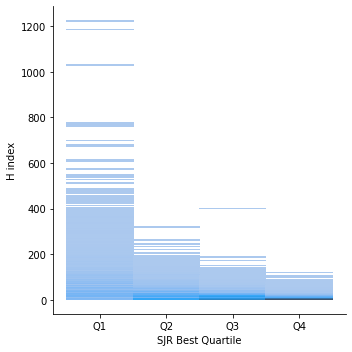

In [51]:
sns.displot(df_sjr, x="SJR Best Quartile", y='H index')


In [18]:
df_sjr['H index'].max()

1226

In [ ]:
g = sns.FacetGrid(df_sjr, col="SJR Best Quartile", margin_titles=True,  sharex=True) # this will create a grid
g.map(sns.distplot, "H index", color="steelblue")

In [ ]:
sns.displot(df_sjr['H index'], vertical=True, kde=False,hue='SJR Best Quartile') # KDE =True - draw gaussian kernel density estimate

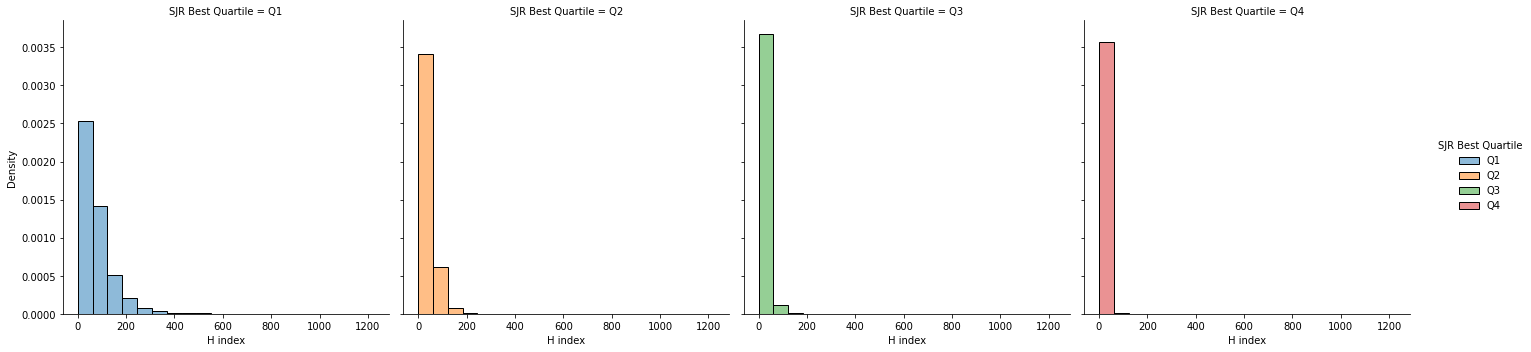

In [53]:
sns.displot(df_sjr, x='H index', hue="SJR Best Quartile", stat="density",bins=20,col="SJR Best Quartile")
